### Soccer predictions with Machine Learning

As my final project for ENSF 611 - Machine Learning, I'm extending on the models and data as presented by https://github.com/tunghoangt/Soccer-prediction-with-Machine-Learning 



#### The Data 

https://github.com/tunghoangt got the data from scraping premier league website , which is a website that provides historical data for English Premier League matches. 



In [533]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#load masterdata.csv
df = pd.read_csv('../Data/PL_site_2006_2018/masterdata.csv')


The data is merged into a mastercsv file, which contains the following columns:

In [534]:
df.head()

,MatchID,Home_team,Away_team,Score_home,Score_away,Possession_home,Possession_away,Shots_on_target_home,Shots_on_target_away,Shots_home,...,Red_cards_away,year,Expenditures_home,Arrivals_home,Income_home,Departures_home,Expenditures_away,Arrivals_away,Income_away,Departures_away
0,5937,Blackburn,Reading,3,3,54.0,46.0,6,4,15,...,0,2007,18.84,21,19.28,25,10.52,25,0.00,19
1,5938,Bolton,Aston Villa,2,2,47.1,52.9,2,2,11,...,0,2007,19.38,16,4.39,16,28.16,17,2.08,18
2,5939,Chelsea,Everton,1,1,59.3,40.7,7,6,20,...,0,2007,101.43,23,59.96,22,20.41,11,2.85,16
3,5940,Liverpool,Charlton,2,2,61.6,38.4,5,4,23,...,0,2007,52.44,27,23.94,28,24.68,31,2.59,36
4,5941,Man Utd,West Ham,0,1,65.3,34.7,7,2,30,...,0,2007,31.01,25,20.52,29,79.63,22,7.70,23


From the github, this is the description of the data: 

"In this project, we want to predict the results of soccer matches using machine learning algorithms. First, it is crucial to choose features that seem to be significant and analyze their influence on match outcomes. From literature reference and our own intuition, we create a set of 17 features that includes individual match statistics like `Score`, `Corners`, `Shots on target`, `Posessions`, etc., and season long statistics for teams such as `Expenditures`, `Income`, `Departure` and `Arrival`, which reflect their investment and squad change every year. `Score` (goal) is an obvious choice as they determine which team wins, and is used to create our target variable. As for other features, they are indicators for how well a team play and can translate to a high probability of goals being scored. Based on the data that we have, we also develop a new feature `Form`, which is a measure of the “streakiness” of a team. Each feature is available for both teams, home and away." 



For the sake of this project, we will not be developing the new feature 'Form', but rather using the data as is.

#### Understanding the data 

Let's take a look at the data and see what we can do with it. Let's first start by analyzing the dataframe. 

In [535]:

#check for data types
print("\nData types: \n", df.dtypes)




Data types: 
 MatchID                   int64
Home_team                object
Away_team                object
Score_home                int64
Score_away                int64
Possession_home         float64
Possession_away         float64
Shots_on_target_home      int64
Shots_on_target_away      int64
Shots_home                int64
Shots_away                int64
Touches_home              int64
Touches_away              int64
Passes_home               int64
Passes_away               int64
Tackles_home              int64
Tackles_away              int64
Clearances_home           int64
Clearances_away           int64
Corners_home              int64
Corners_away              int64
Offsides_home             int64
Offsides_away             int64
Yellow_cards_home         int64
Yellow_cards_away         int64
Fouls_conceded_home       int64
Fouls_conceded_away       int64
Red_cards_home            int64
Red_cards_away            int64
year                      int64
Expenditures_home       f

We want to predict the match outcome based on various features as shown in the table below.

Using domain knowledge, we can conclude that the team's names do not have any impact on the outcome of the match. Therefore, we can drop the team names.

In [536]:
#drop Home_team and Away_team columns

df.drop(['Home_team', 'Away_team'], axis=1, inplace=True)

#drop nan values

df.dropna(inplace=True)



In [537]:
df.head()

,MatchID,Score_home,Score_away,Possession_home,Possession_away,Shots_on_target_home,Shots_on_target_away,Shots_home,Shots_away,Touches_home,...,Red_cards_away,year,Expenditures_home,Arrivals_home,Income_home,Departures_home,Expenditures_away,Arrivals_away,Income_away,Departures_away
0,5937,3,3,54.0,46.0,6,4,15,11,553,...,0,2007,18.84,21,19.28,25,10.52,25,0.00,19
1,5938,2,2,47.1,52.9,2,2,11,7,457,...,0,2007,19.38,16,4.39,16,28.16,17,2.08,18
2,5939,1,1,59.3,40.7,7,6,20,11,615,...,0,2007,101.43,23,59.96,22,20.41,11,2.85,16
3,5940,2,2,61.6,38.4,5,4,23,9,632,...,0,2007,52.44,27,23.94,28,24.68,31,2.59,36
4,5941,0,1,65.3,34.7,7,2,30,8,825,...,0,2007,31.01,25,20.52,29,79.63,22,7.70,23


In [538]:
#df to csv
df.to_csv('../Data/PL_site_2006_2018/masterdata2.csv', index=False)

By infering the csv to get a better idea of the data, we can also see that there is a 'year' value in the table which can be dropped since we aren't doing time series analysis and that the 'MatchID' column is just a unique identifier for each match. Let's dop those columns. 

In [539]:
#drop columns MatchID, year

df.drop(['MatchID', 'year'], axis=1, inplace=True)

#check for data types
print("\nData types: \n", df.dtypes)



Data types: 
 Score_home                int64
Score_away                int64
Possession_home         float64
Possession_away         float64
Shots_on_target_home      int64
Shots_on_target_away      int64
Shots_home                int64
Shots_away                int64
Touches_home              int64
Touches_away              int64
Passes_home               int64
Passes_away               int64
Tackles_home              int64
Tackles_away              int64
Clearances_home           int64
Clearances_away           int64
Corners_home              int64
Corners_away              int64
Offsides_home             int64
Offsides_away             int64
Yellow_cards_home         int64
Yellow_cards_away         int64
Fouls_conceded_home       int64
Fouls_conceded_away       int64
Red_cards_home            int64
Red_cards_away            int64
Expenditures_home       float64
Arrivals_home             int64
Income_home             float64
Departures_home           int64
Expenditures_away       f

In [540]:
df.head()

,Score_home,Score_away,Possession_home,Possession_away,Shots_on_target_home,Shots_on_target_away,Shots_home,Shots_away,Touches_home,Touches_away,...,Red_cards_home,Red_cards_away,Expenditures_home,Arrivals_home,Income_home,Departures_home,Expenditures_away,Arrivals_away,Income_away,Departures_away
0,3,3,54.0,46.0,6,4,15,11,553,464,...,0,0,18.84,21,19.28,25,10.52,25,0.00,19
1,2,2,47.1,52.9,2,2,11,7,457,493,...,0,0,19.38,16,4.39,16,28.16,17,2.08,18
2,1,1,59.3,40.7,7,6,20,11,615,471,...,0,0,101.43,23,59.96,22,20.41,11,2.85,16
3,2,2,61.6,38.4,5,4,23,9,632,420,...,0,0,52.44,27,23.94,28,24.68,31,2.59,36
4,0,1,65.3,34.7,7,2,30,8,825,506,...,0,0,31.01,25,20.52,29,79.63,22,7.70,23


#### Determining the target variable

We want the target label to be the resulting score of the match. We can create a new column called "Result" which will be:

* 1 if the home team wins
* 0 if the away team wins
* -1 for a draw




In [541]:


df['Result'] = np.where(df['Score_home'] > df['Score_away'], 1, np.where(df['Score_home'] < df['Score_away'], 0, -1))

df.drop(['Score_home', 'Score_away'], axis=1, inplace=True)

df.head()




,Possession_home,Possession_away,Shots_on_target_home,Shots_on_target_away,Shots_home,Shots_away,Touches_home,Touches_away,Passes_home,Passes_away,...,Red_cards_away,Expenditures_home,Arrivals_home,Income_home,Departures_home,Expenditures_away,Arrivals_away,Income_away,Departures_away,Result
0,54.0,46.0,6,4,15,11,553,464,356,287,...,0,18.84,21,19.28,25,10.52,25,0.00,19,-1
1,47.1,52.9,2,2,11,7,457,493,318,343,...,0,19.38,16,4.39,16,28.16,17,2.08,18,-1
2,59.3,40.7,7,6,20,11,615,471,425,305,...,0,101.43,23,59.96,22,20.41,11,2.85,16,-1
3,61.6,38.4,5,4,23,9,632,420,453,271,...,0,52.44,27,23.94,28,24.68,31,2.59,36,-1
4,65.3,34.7,7,2,30,8,825,506,619,333,...,0,31.01,25,20.52,29,79.63,22,7.70,23,0


Now we can split the table to have our features and our target variable.

In [542]:
# "Result" column from df into y

y = df['Result']


# drop column "Result" from df

df.drop(['Result'], axis=1, inplace=True)

# X is the feature set, df 
X = df

print(X.shape), print(y.shape)

(4556, 32)
(4556,)


(None, None)

##### Now that we have our features and target, we can start to do some analysis on the data prior to training it on models. 

### Feature Reduction

We can see that there are a lot of features in the data. We can reduce the number of features by dropping the columns that are not relevant to the outcome of the match. To do this we can use PCA. 

##### Feature Importance

We can also use feature importance to determine which features are most important to the outcome of the match. To do this we can use the Random Forest Classifier.



In [543]:
#Test train split

from sklearn.model_selection import train_test_split

#Scale the data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape), print(X_test.shape)

(3644, 32)
(912, 32)


(None, None)

In [544]:

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

print(importances.shape)


(32,)


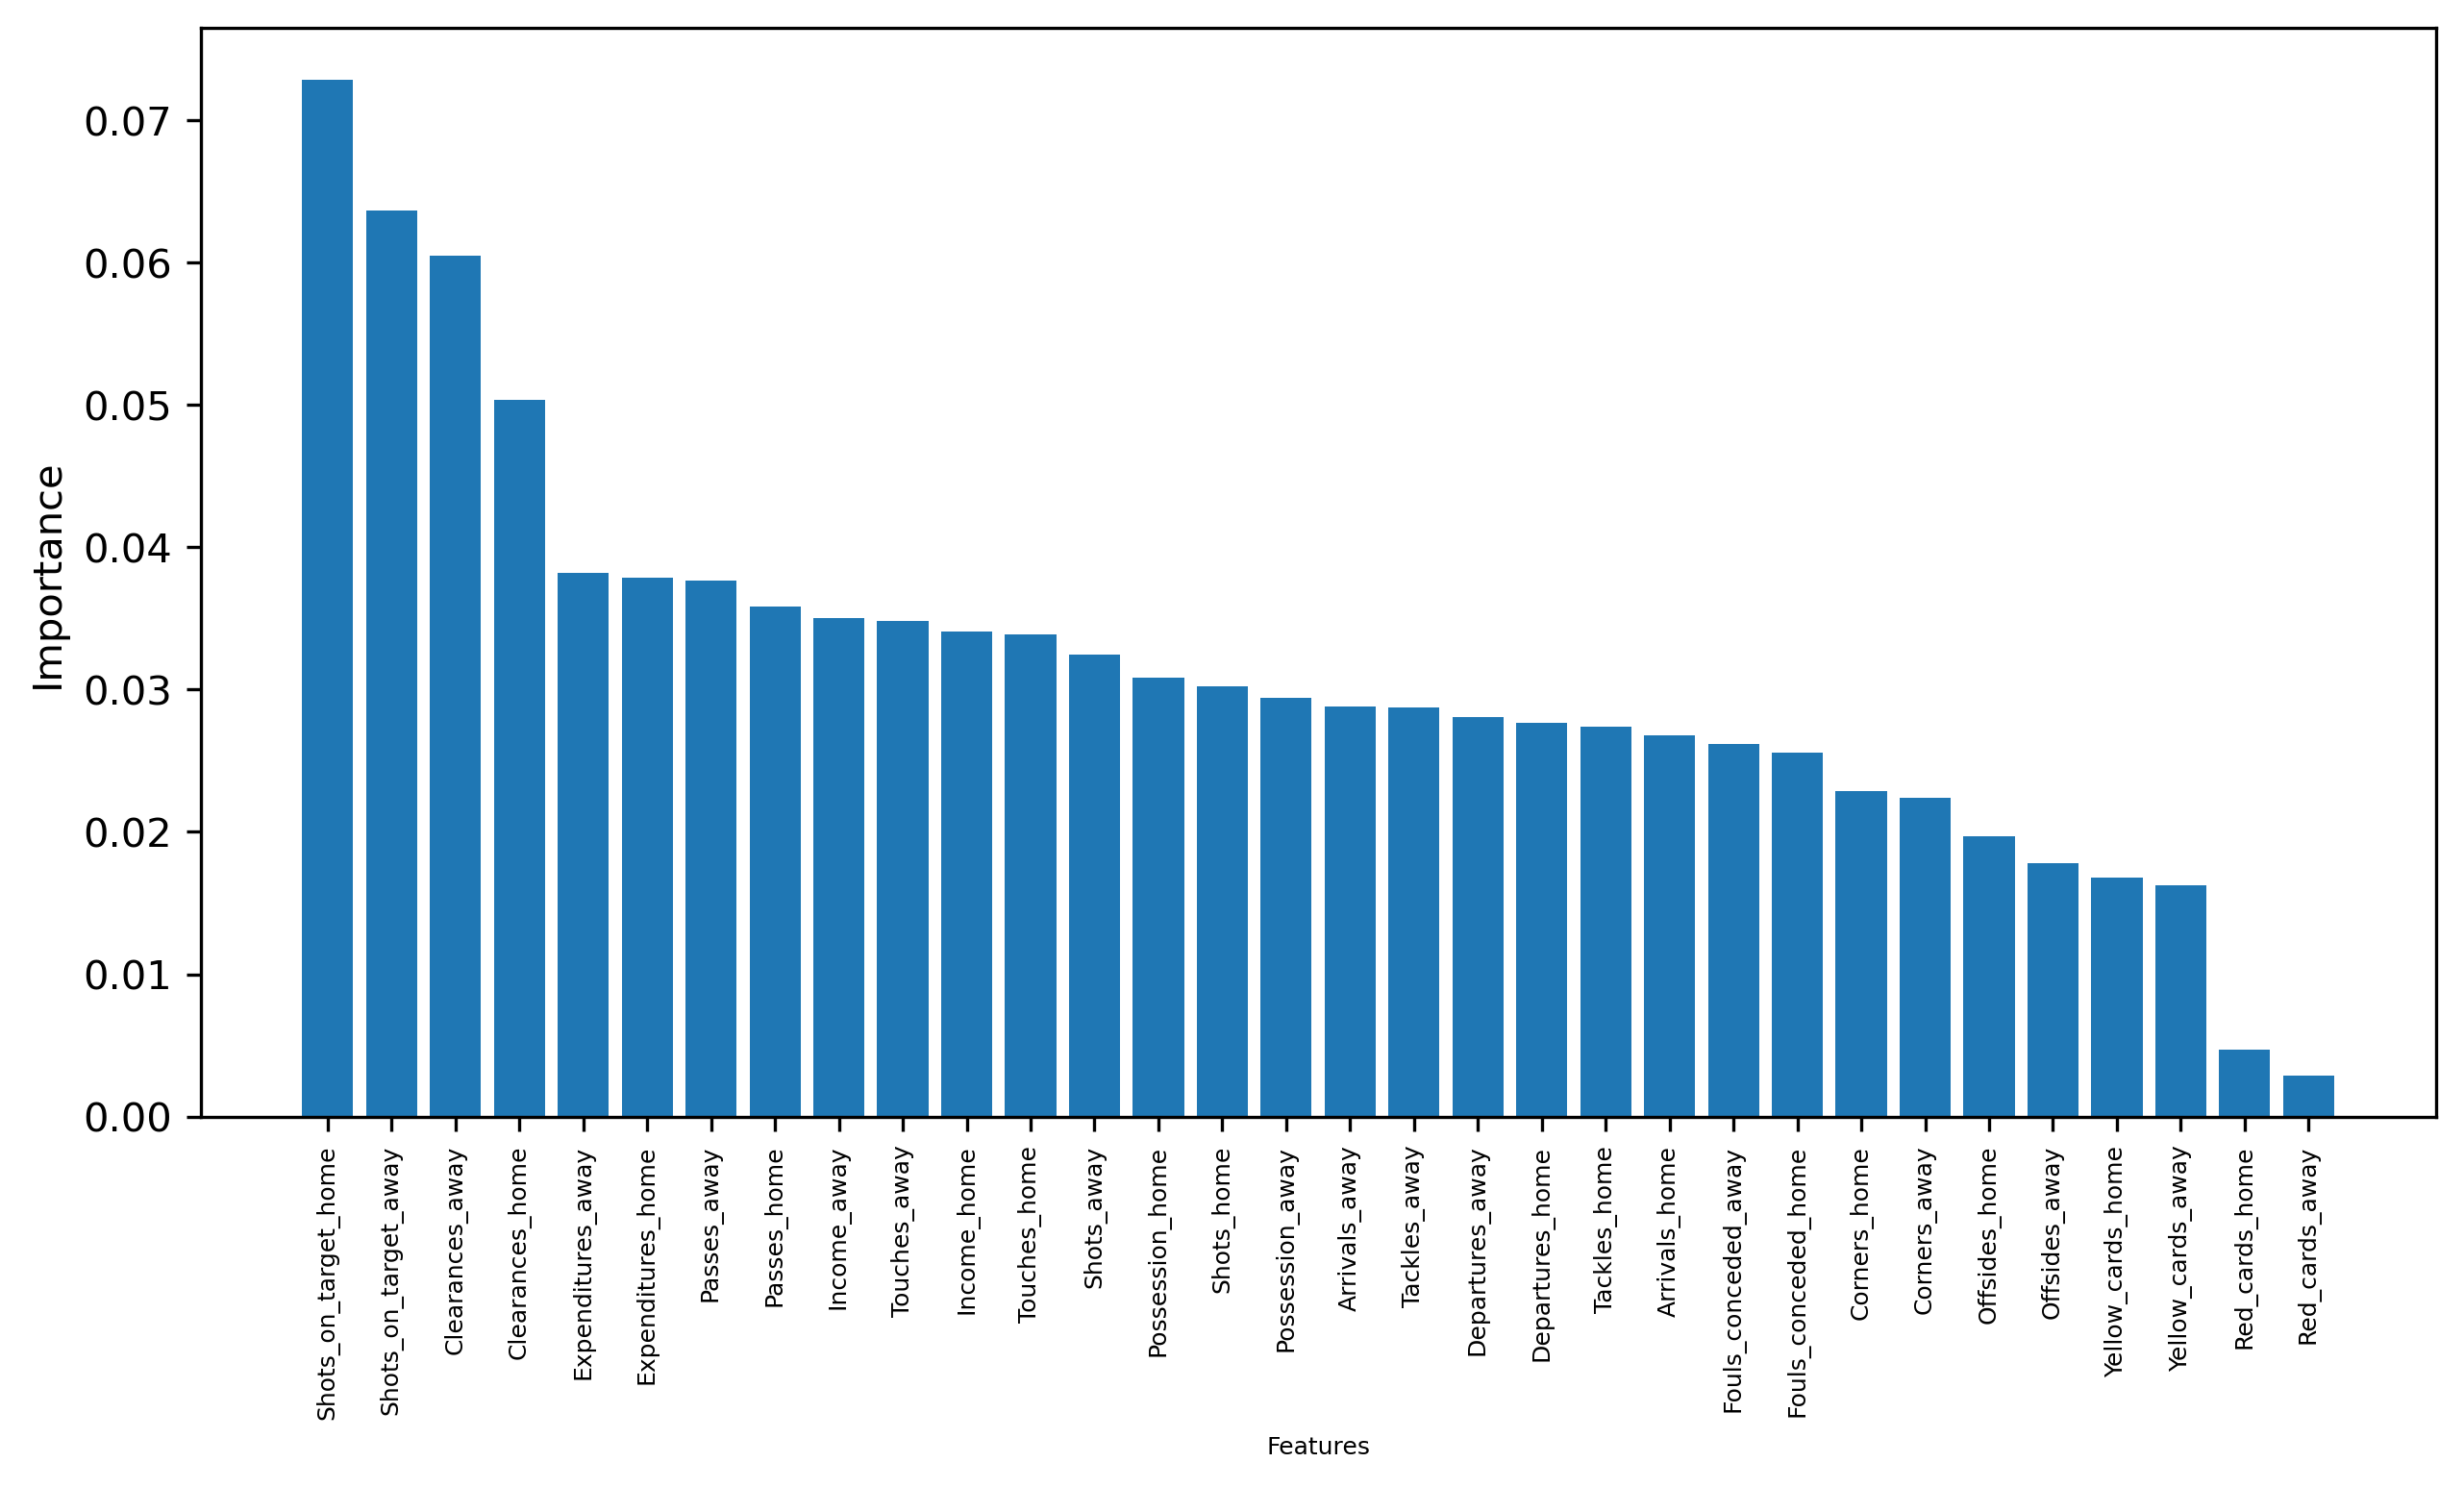

In [545]:
import numpy as np
import matplotlib.pyplot as plt


# Sort feature importances and their corresponding feature names
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
feature_names = X.columns

# Plot feature importances and space out the bars

plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), sorted_importances, align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90, fontsize=6)
plt.xlabel('Features', fontsize=6)
plt.ylabel('Importance')
plt.gcf().set_dpi(300)
plt.show()



From this we can infer that the top 5 features are:

Shots on target, Clearances, Passes, Touches and Expenditures. 

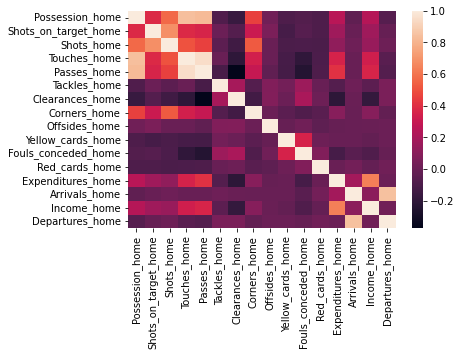

In [546]:
# This code is from the github I'm using as a reference
home_features = [ f for f in list(X) if '_home' in f ]
corr = X[home_features].corr()
_ = sns.heatmap(corr)


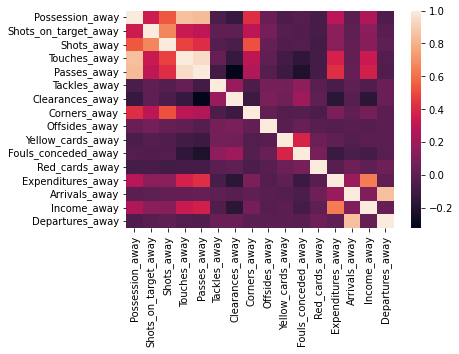

In [547]:
home_features = [ f for f in list(X) if '_away' in f ]
corr = X[home_features].corr()
_ = sns.heatmap(corr)

### Training the models

From the github: 

" The predicting features will be fed as inputs to Machine Learning classifier algorithms such as `Logistic Regression` (LR), `K-Nearest Neighbors` (KNN), `Gradient Boosting` (GB), `Support Vector Machine` (SVM) and `Random Forest` (RF). The prediction is in one of three classes for each game, with respective to the home team: win, draw, or loss. To improve model performance, we implement various techniques such as `Sequential Backward Selection` (SBS) for features selection, or `Principal Component Analysis` (PCA) for feature extractions, and cross-validation for model evaluation & selection. "


For the scope of this project, we will not be implementing SBS. We will be using the same models as the github, but will be using PCA to reduce the number of features.

#####

In [548]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Apply feature scaling first
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the explained variance
X_pca = pca.fit_transform(X_scaled)

# Train-test split and model training with X_pca

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [549]:
#Shape after PCA

print(X_pca.shape)

(4556, 23)


#### Helper functions

These functions are derived from the previous ENSF 611 labs. 

In [550]:
from sklearn.model_selection import cross_validate


def get_classifier_cv_score(model, X, y, scoring='accuracy', cv=7):
    '''Calculate train and validation scores of classifier (model) using cross-validation
        
        
        model (sklearn classifier): Classifier to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        scoring (str): a scoring string accepted by sklearn.metrics.cross_validate()
        cv (int): number of cross-validation folds see sklearn.metrics.cross_validate()
        
        returns: mean training score, mean validation score
    
    '''
    
     #TODO: Implement function body
    scores = cross_validate(estimator=model, X=X, y=y, scoring=scoring, cv=cv, return_train_score=True, n_jobs=-1)
    return (scores['train_score'].mean(), scores['test_score'].mean())

    
    

In [551]:
# DO NOT NEED TO ADD ANYTHING TO THIS FUNCTION
def print_grid_search_result(grid_search):
    '''Prints summary of best model from GridSearchCV object.
    
        For the best model of the grid search, print:
        - parameters 
        - cross-validation training score
        - cross-validation validation score 
        
        scores are printed with 3 decimal places
    
        grid_search (sklearn GridSearchCV): Fitted GridSearchCV object
        
        returns: None
        
    '''
    
    print(grid_search.best_params_)
    print("training score= {:.3f}; validation score={:.3f}".format(grid_search.cv_results_['mean_train_score'][grid_search.best_index_],
                                                                  grid_search.cv_results_['mean_test_score'][grid_search.best_index_]))

In [552]:
# DO NOT NEED TO ADD ANYTHING TO THIS FUNCTION
import mglearn

def plot_grid_search_results(grid_search):
    '''For grids with 2 hyperparameters, create a heatmap plot of test scores
        
        grid_search (sklearn GridSearchCV): Fitted GridSearchCV object
        
        uses mglearn.tools.heatmap() for plotting
    
    '''
    results = pd.DataFrame(grid_search.cv_results_)

    params = sorted(grid_search.param_grid.keys())
    
    assert len(params) == 2, "We can only plot two parameters."
    
    # second dimension in reshape are rows, needs to be the fast changing parameter
    scores = np.array(results.mean_test_score).reshape(len(grid_search.param_grid[params[0]]),
                                                      len(grid_search.param_grid[params[1]]))

    # plot the mean cross-validation scores
    # x-axis needs to be the fast changing parameter
    mglearn.tools.heatmap(scores, 
                          xlabel=params[1], 
                          xticklabels=grid_search.param_grid[params[1]], 
                          ylabel=params[0], 
                          yticklabels=grid_search.param_grid[params[0]],
                          cmap="viridis", fmt="%0.3f")

In [553]:
# DO NOT NEED TO ADD ANYTHING TO THIS FUNCTION
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_actual, y_pred, labels, title):
    '''Creates a heatmap plot of the confusion matrix.
    
        y_actual (pandas.DataSeries or numpy.Array): Ground truth label vector
        y_pred (pandas.DataSeries or numpy.Array): Predicted label vector
        labels (list(str)): Class names used for plotting (ticklabels)
        title (str): Plot title
        
        uses sklearn.metrics.confusion_matrix
        
    '''
    
    mat = confusion_matrix(y_actual, y_pred)

    sns.heatmap(mat, 
                xticklabels=labels,  
                yticklabels=labels, 
                square=True, annot=True, cbar=False, 
                fmt='d')
    plt.xlabel('predicted value')
    plt.ylabel('true value')
    plt.title(title)

#### Using Cross Validation to determine the best model

In [554]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

classifiers = [LogisticRegression(max_iter=10000), SVC(), RandomForestClassifier(random_state=55), GradientBoostingClassifier(random_state=56),KNeighborsClassifier()]
for model in classifiers:
    print(model)
    trainscore,testscore = get_classifier_cv_score(model, X_train, y_train)

    print(f'Train score: {trainscore:.3f}')
    print(f'Validation score: {testscore:.3f}')
    print('\n')

LogisticRegression(max_iter=10000)
Train score: 0.626
Validation score: 0.617


SVC()
Train score: 0.737
Validation score: 0.609


RandomForestClassifier(random_state=55)
Train score: 1.000
Validation score: 0.597


GradientBoostingClassifier(random_state=56)
Train score: 0.778
Validation score: 0.606


KNeighborsClassifier()
Train score: 0.680
Validation score: 0.497




* LogisticRegression has the highest training and validation scores, indicating that it is the best-performing model.

* GradientBoostingClassifier also has high scores, but its validation score is slightly lower than that of LogisticRegression.

* RandomForestClassifier has a relatively high training score but a lower validation score, indicating that it may be overfitting the data. In this case, reducing the max_depth hyperparameter may help to reduce overfitting and improve the model's performance.

* KNeighborsClassifier has a low validation score, indicating that it may not be a good fit for the data.

* SVC has low training and validation scores, indicating that it is not performing well on the data.

Following those results, we can tell that `LogisticRegression` is the best model for this data and the way we've preprocessed it. Let's go ahead and do a grid search to find the best hyperparameters for the model.

In [555]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression

logreg = LogisticRegression(max_iter=10000)

# Define the parameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.1, 1, 10, 100],
}

# Perform the grid search

grid_search = GridSearchCV(logreg, param_grid, cv=7, n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             return_train_score=True)

In [556]:
print_grid_search_result(grid_search)


{'C': 0.1, 'penalty': 'l2'}
training score= 0.625; validation score=0.618


### Hyperparameter tuning  results

The best hyperparameters for the LogisticRegression model are:

* C: 10
* penalty: l2
* max_iter: 10000

The best score is: 

Training Score: 0.625, Validation Score: 0.618

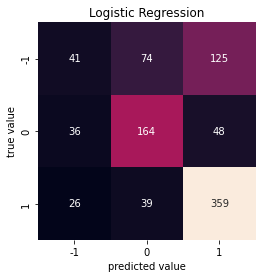

In [558]:
plot_confusion_matrix(y_test, grid_search.predict(X_test), grid_search.classes_, 'Logistic Regression')

In [559]:
from sklearn.metrics import classification_report

print(classification_report(y_test, grid_search.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.40      0.17      0.24       240
           0       0.59      0.66      0.62       248
           1       0.67      0.85      0.75       424

    accuracy                           0.62       912
   macro avg       0.55      0.56      0.54       912
weighted avg       0.58      0.62      0.58       912



## Conclusions 

We can see that the model is not very accurate, but it is a good starting point for further analysis. The model can be improved by adding more features, such as the 'Form' feature that was mentioned in the github. 

    For the extent of work I did on this model, I was able to get a 61.8% accuracy on the validation set. However I believe that with more time and effort, a better model can be created. While on the github, they ran simulations to predict the winner of the premier league. Since they used some techniques and methods not used in this course, I decided to keep it simple and just predict the outcome of a match.

    The most important feature in the model was the 'Shots on target' feature. This makes sense, as the more shots on target, the more likely it is that the team will score. 

#### Possible use Cases 

    In a chess game, every move is calculated and analyzed to determine the best move. In soccer, the game is much more dynamic and the players are not as predictable. This model can be used to determine the best possible move for a team to make. How that can be integrated into the game is beyond my expertise. 

#### Future Work 

    I would like to continue working on this project and improve the model. I would like to add the 'Form' feature and see how it affects different models and perhaps try some different data, ways to determine the result of a match prior to it even starting. 

### Reflection 

i. Why did you select this problem to solve?

    I selected this problem to solve because I am a big soccer fan and I thought it would be interesting and fun to see if I could predict the outcome of a match using machine learning.

ii. Were there any deviations from your proposal? Explain why (or why not).

    While the proposal noted that I would use Neural Networks, I decided to use the models that were used in the github. Also, Neural network were not part of this course. I also did not use linear regression as it would not work with the dataset, and I also didn't use Naive Bayes as the github being referenced did not use it either. 
    
    I also decided to use PCA to reduce the number of features. The reason was due to expertise and time constraints. 

    Furthermore, I found that the github had already done the work of preprocessing the data, so I decided to use the data as is rather than going through the process of preprocessing the data myself.


iii. What did you find difficult about this project? What did you find easy?
What did you learn?

    I found it difficult to find a good combination of features that would work well with predicting the outcome of a match before it even started. This would probably require some further research and time. 

    I found it easy that I was lucky enough to find the github that has already done the work of preprocessing the data by webscraping and putting it all together, it saved me a lot of time and served as a good starting point. 